This notebook illustrates how to use scikit-bio's global aligner to perform progressive multiple sequence alignment. The concept is discussed in more detail in the Multiple Sequence Alignment chapter of [An Introduction to Applied Bioinformatics](caporasolab.us/An-Introduction-To-Applied-Bioinformatics).

First, we'll load up some sequence from the [Greengenes 13_5](http://www.ncbi.nlm.nih.gov/pubmed/22134646) 61% OTUs. These are modified to drop any degenerate characters, which should then show up as gaps in the resulting alignments.

**NOTE: for the sake of runtime, I'm currently computing the alignment from only the first 50 bases of the sequences.**

In [1]:
from __future__ import division
from six import StringIO

import skbio.io
from skbio import DNA, SequenceCollection

sequences = StringIO(""">229854
GAGTTTGATCCTGGCTCAGATTGAACGCTGGCGGCATGCTTAACACATGCAAGTCGAACGGCAGCATGACTTAGCTTGCTAAGTTGATGGCGAGTGGCGAACGGGTGAGTAACGCGTAGGAATATGCCTTAAAGAGGGGGACAACTTGGGGAAACTCAAGCTAATACCGCATAAACTCTTCGGAGAAAAGCTGGGGACTTTCGAGCCTGGCGCTTTAAGATTAGCCTGCGTCCGATTAGCTAGTTGGTAGGGTAAAGGCCTACCAAGGCGACGATCAGTAGCTGGTCTGAGAGGATGACCAGCCACACTGGAACTGAGACACGGTCCAGACTCCTACGGGAGGCAGCAGTGGGGAATATTGGACAATGGGGGCAACCCTGATCCAGCAATGCCGCGTGTGTGAAGAAGGCCTGAGGGTTGTAAAGCACTTTCAGTGGGGAGGAGGGTTTCCCGGTTAAGAGCTAGGGGCATTGGACGTTACCCACAGAAGAAGCACCGGCTAACTCCGTGCCAGCAGCCCGCGGTAATACGGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCCGTTAAAAGGTGCCTAAGGTGGTTTGGATAGTTATGTGTTAAATTCCCTGGCGCCTCCACCCTGGGCCAGGTCCATATAAAAACTGTTAAACTCCGAAGTATGGGCACAAGGTAATTGGAAATTCCGGTGGTACCGTGAAAATGCGCTTAGAGATCGGGAAGGGACCACCCCAGTGGGGAAGGCGGCTACCTGGCCTAATAACTGACATTGAGGCACGAAAAGCGTGGGGAGCAACCAGGATTAGATACCCTGGTAGTCCACGCTGTAAACGATGTCAACTAGCTGTGGTTATATGAATATAATTAGTGGCGAAGCTAACGCGATAAGTTGACCGCCTGGGGAGTACGGTCGCAAGATTAAAACTCAAAGGAATGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCTACCCTTGACATACAGTAAATCTTTCAGAGATGAGAGAGTGCCTTCGGGAATACTGATACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGTAACGAGCGCAACCCTTATCTCTAGTTGCCAGCGAGTAATGTCGGGAACTCTAAAGAGACTGCCGGTGACAAACCGGAGGAAGGCGGGGACGACGTCAAGTCATCATGGCCCTTACGGGTAGGGCTACACACGTGCTACAATGGCCGATACAGAGGGGCGCGAAGGAGCGATCTGGAGCAAATCTTATAAAGTCGGTCGTAGTCCGGATTGGAGTCTGCAACTCGACTCCATGAAGTCGGAATCGCTAGTAATCGCGAATCAGCATGTCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGGAGTGGGCTGCACCAGAAGTAGATAGTCTAACCGCAAGGGGGACGTTTACCACGGTGTGGTTCATGACTGGGGTGAAGTCGTAACAAGGTAGCCG
>2107103
TTTTCTTGGATTTGATTCTGGTCCAGAGTAAACGCTTGAGATATGTTGATACATGTTAGTTAAACGTGAATATTTGGTTTTTATGCCAACTTTATTTAAGTAGCGTATAGGTGAGTAATATGCAAGAATCCTACCTTTTAGTTTATGTAGCTCGTAAATTTATAAAAGATTTTTTCGCTAAAAGATGGGCTTGCACAAGATTAGGTTTTTGGTTTGCTAAAAACGTTCCAAGCCTAAGATCTTTAGCCGGCTTTCGTGAGTGACCGGCCACATAGGGACTGAGACAATGCCCTAGCTCCTTTTCTGGAGGCATCAGTACAAAGCATTGGACAATGAACGAAAGTTTGATCCAGTAATATCTCGTGAATGATGAAGGGTTTTTGCTCGTAAATTTCTTTTAGTTGAAAGAAAAAAGATATATTTCAACAGAAAAAATCCTGGCAAATCCTCGTGCCAGCAGCCGCGGTAATACGAGAAGGGTTAGCGTTACTCGAAATTATTGGGCGTAAAGTGCGTGAACAGCTGCTTTTTAAGCTATAGGCAGAAAAATCAAGGGTTAATCTTGTTTTTGTCATAGTTCTGATAAGCTTGAGTTTGGAAGAAGATAATAGAACATTTTATGGAGCGATGAAATGCTATGATATAAAAGAGAATACCAAAAGCGAAGGCAGTTATCTAGTACAAAACTGACGCCTATACGCGAAGGCTTAGGTAGCAAAAAGGATTAGGGACCCTTGTAGTCTAAGCTGTCAACGATGAACACTCGTTTTTGGATCACTTTTTTTCAGAAACTAAGCTAACGCGTTAAGTGTTTCGCCTGGGTACTACGGTCGCAAGACTAAAACTTAAAGAAATTGGCGGGAGTAAAAACAAGCAGTGGAGCGTGTGGTTTAATTCGATAGTACACGCAAATCTTACCATTACTTGACTCAAACATTGAAATGCACTATGTTTATGGTGTTGTTTAAGTATTATTTTACTTATAGATGTGCAGGCGCTGCATGGTTGTCGTCAGTTCGTGTCGTGAGATGTTTGGTTAATTCCCTTAACGAACGTAACCCTCAAAGCATATTCAAAACATTTTGTTTTTTTGTTAAACAGTCGGGGAAACCTGAATGTAGAGGGGTAGACGTCTAAATCTTTATGGCCCTTATGTATTTGGGCTACTCATGCGCTACAATGGGTGTATTCTACAAAAAGACGCAAAAACTCTTCAGTTTGAGCAAAACTTGAAAAGCACCCTCTAGTTCGGATTGAACTCTGGAACTCGAGTTCATAAAGTTGGAATTGCTAGTAATCGTGAGTTAGCGTATCGCGGTGAATCGAAAATTTACTTTGTACATACCGCCCGTCAAGTACTGAAAATTTGTATTGCAAGAAATTTTTGGAGAATTTACTTAACTCTTTTTTTTTTTAAGTTGGCTGTATCAGTCTTTTAAAAACTTTGAGTTAGGTTTTAAGCATCCGAGGGTAAAAGCAACATTTTTTATTGGTATTAAGTCGTAACAAGGTAGCCCTACGGG
>696036
AGAGTTTGATCATGGCTCAGGATGAACGTTGGTAGTATGCCTAACACATGCAAGTCGAGCGGAAAGTAGTAGCAATATTACCTTTAGCGGCGAACGGGTGAGTAATACTTATCTTACCTGCCATTTAGTGGGGGATAAAATTCCGCATATTATGAGTAATCATGAAAGGGCTTTCGGGCTCGCTAATTGATGGGGATAAGTCGTATTAGTTAGTTGGTGGGGTAATGGCCTACCAAGACAATGATGCGTAGCCAGTCTGAGAGGATGAATGGCCACAAAGGAACTGAGACACGGTCCTTACTCCTATTGAGGAGGCAGCAGTGGGGAATATTCTGCAATGGGGGAAACCCTGACAGAGCAATACTACGTGAAGGAGGAAGGTCTACGGATTGTAAACTTCTTTACTTAAATGTACTAACCGCAAGGTTTTGCATTTGAGCAAAAAGCGACGACTAACTATGTGCCAGCAGTCGCGGTAAGACATAGGTCGCGAACGTTATCCGGAATTATTGGGCGTAAAGGATGCGTAGATGGTTCAGTAAGTTACTGGTGGGAAATCGAGGCCTAACCTCGTGGAAGTCAGTAATACTGTTGAACTTGAGTGCAGGAGAGGTTAACGGAACTTCATGTGGAGCGGTAAAATGCGTAGATATATGAAAGAACATCAATATAGCGAAGGCAGTTAACTATTCTGCTACTGACATTGAGGCATGAAAGCGTGGGGAGCAAAACGGATTAGATACCCGTGTAGTCCACGCCCTAAACGATGAGTGCTAGATATTGGGAACTTGATTCTCAGTGTCGCTAGGTAACCCGGTAAGCACTCCGCCTGGGGAGTACGCTCGCAAGAGTGAAACTTAAAGGAATTGACGGGGACTCGCACAAGCAGTGGAGCATGTGGTTTAATCCGATACAACGCGTAGAACCTTACCAAGGCTTGACATGTAAGGTAGCAATACTAAATTAGGGAAACCTAGTTGAATTACACAGGTGCTGCATGGCCGTCGTCAGTTCGTGCCGTGAGGTGTATGGTTAAGTCCTATAACGAACGCAACCCTTGTCCTTAGTTGCCAGCATTCAGTTGGGGACTCTAAGGAGACTGCAAGGCATGTTTATGCATGTCTGAACTGAGTAATCAGGAGGAAGGAAAGGATGACGCCTGGTCGTCATGGCCCTTATGCCTTGGGCGACACACGTGCTACAATGGTTAGTACAAAGGGTCGCCAACCCGCGAGGGGGAGCTAATCTCAAAAAACTAACCGCAGTTCAGATTGGAGGCTGCAACTCGCCTCCATGAAGGTGGAATTGCTAGTAATCGTAAATCAGCCATGTTACGGTGAATACGTTCTCGAGTCTTGTACACACCGCCCGTCAAATCACGAAAGTCGGTAATGCCTAAAACCAGTTGATTAACCCGCAAGGGATACAGCTGACAAGGGTAGGATTGGCAATTGGGGTTAAGTCGTAACAAGGTAGCCGTAG
>3190878
TTAATACATGCGAGTTGAACGTGAATTTTTTAATTAAAATGAAAGTAGCGTACTGGTGAGTAACACGTGAGAATCTACCTTTCAAATCAACATAAAATGTTGAATAAAAGCTTCTAAAGCTATAAAGATATGTTTTCGTTGAAAGATGAGCTTGCGCAAGATTAGGTAGTTGGTAAGGTAACGGCTTACCAAGCCAAAGATCTTTAGCTGGTTTGAGAAAATGATCAGCCACATTGGAACTGAAACACAGTCCAAACGTAATATAACGGCAGCAGTAGGGAATTTTGAACACTGAGCGAAAGCTTGATTCAGCCAAGTATCGTGGATGAAGAAGGCTGTCTTTTGGTCGTAAAATCCATTTATATAGTCACATGAAATGTGTCTTTTATTTCGATAAAAGGAAAGATTATGACTTTCTATTGAAAAGTCCCGGCTAATCTCGTGCCAGCAGCCGCGGTAATACGAGAGGGGCAAACGATGTTTAGCATGATTGGGCGTAAAGAGCTTGTAGATGGTTTCTTTTAATTTTATATAAAAGCTCTAAGCTTAACTTTGATTATATATAAAGGAAAGATAACTTGAGTTATGGAAAGGAAAGTAGAATTCTTGGAGGAGAGGTAGAATTTGGTGATATCAAGAGGAATTCCAAAAGCGAAGGCAGCTTTCTTGCCATATACTGACATTGAAGGGCGAAAGCGTGGGTAGCGACAGGGATTAGATACCCCATTAGTCCACGCCGTCAACGATGACCTTTATTTATTGGTTTCTCTTAAAATAAATAAATTATTTTTTAGTTTGATCAGTGAAACAGTTAACGCGTTAAAAGGTCCGCCTGAGGAGTACGATCGCAAGATTAAAACTCAAAAGAATAGACGGGAGCGTTCACAAGTGGTGGAGCATGAAGTTTAATGCGATACAACACGCAAAACCTTACCATTTTTTGATATTTTACTTATCAGTTATTTCTCATGAAATAATGTTTTTTACTAAAGTAAAAATTTGTTTGTATAACAGGCGTTGCATGGCTGTCGTAAGTTCGTACTGTGAAGTGTTGGATTAATTTCCTTAACGAACGTAACCCCTTGGTTTTGTTAAAACTAAAATCTACCGCTAGTCATAAACTAGAGGAAGGGAGGGATCACGTCAAGTCCTCATGACCCTTATAAAATGGGCTACGCTTTTCGTGCTACAATGATAAATACAATAAGAAGCAATAACGAAAGTTGGAGCAAATCTATAAAATTTATCTCAGTTCAGATTGTTCTCTGCAATTCGAGAACATGAAGATGGAATCACTAGTAATCGTAGATCAGCATGCTACGGTGAATATGTAATTACGCTCTGTACTCACAGCCCGTCACACAATGGAAGTAAAATGTATCGGAAATTTGTCAAATATTGTTAGATTTTCTTTTTTAAATTTATTGAATAAATTATTTTAATTAATATCTTTCAACTAAATGGGAACTGATGATATGTTTCATGACTGTTGTGAAGTCGTAACAAGGTAGCGCTAGCGGAAGCTGGTGCTGGAT
>3761685
GATGAACGCTCGCGGCGTGCCTAAGGTATGCAAGTCGAACGCCGACCTTCGGGTCGTGCGTGGCGAACGGGTGAGTAACGCGTGGGAACGTACCGCCGAGATGGGGACAACTCCGCGAAAGCGGAGCTAATACCCAATGGTCCCGGGTCGTACCTCACTGCGTTCGGTACGGATACGATGGACATTCGTATTCCCGCGCCGAGCGTAGCGAGGTGCGACTTGGGTAAAGGAGCAATCCGCTCGGTGAGCGGCCCGCGTCCTATCAGCTTGTTGGTGGGGTAATGGCCTACCAAGGCGATGACGGGTAGGGGGTGTGAGAGCATGATCCCCCACAATGGCACTGAGACAAGGGCCATACACCTACGGGTGGCAGCAATCAGGAATCTTGCGCAATGGGCGAAAGCCTGACGCAGCGACGCCGCGTGGAGGATGAAGGTCGAGAGATTGTAAACTCCTAGCCTTGTGCGTAGCACAAGGGGTTCGTATATCGTTAGTCGGTTACGAAGCCCGTATCGTAAGGCGGTTACGGTTACGTGAAAAACACGTAACCCAATCACGTGACCGAAACGGGCATCGTTACCGTAACCGGCAGACGTTTCACGAATCTCTCGTGTTACGCGCGAGGGGATAAAGTCCCGGCTAACTACGTGCCAGCAGCAGCGGTAAAACGTAGGGGCGAGCGCTATCCGGATTTATTGGGCGTAAAGAGTGCAGGCGCCAGGTTTTTCGTTAAAGCCCCCCGCTCAACGGGGGAACTGCGGAGAATACTGTTTGGCTGGAGGAAGGTAGAGGCTGTCGGAACTCGGGGAGGAGGGGTGAAATCCTATGATCCCCCAAGGAACACCAAAGGCGAAGGCAGACAGCTGGGCCTTTCCTGACGCTGAGGCACGAAAGCTAGGGGAGCGAAACGGATTAGATACCCGTGTAGTCCTAGCCGTAAACGATCCCCGCTAGATTTTGGCATCTGTCAGAGTCGAAGCTAACGCATTAAGCGGGGCGCCTGGGAAGTACGGCCGCAAGGCTAAAACTCAAAGGAATTGACGGGGACCCGCACAAGCGGTGGAGCGCCTGGTTTAATTCGATGATAACCGAAGAACCTTACCAGGGCTTGACATCCCGACAGAAATCCCGACGAAAGTTGGGCCCCCCGCAAGGGCTGTCGGGACAGGTGTTGCATGGCTGTCGTCAGCTCGTGCCGTGAGGTGTATGCTTAAGTGCCGAAACGAGCGCAACCCCTACCCCATGTTAGAAATGTCGTGGGGGACTGCCTCCGTAAGGGGGAGGAAGGTGGGGACGACGTCAAGTCAGTATGGCCCTTATGCCCTGGGCAACACAGACGCTACAATGGCGGCTACAACGGGTTGCAATGTCGTAAGGCGGAGCTAATCCTAAAAAGCCGTCTCAGTTCGGATTGGGGGCTGAAACCCGCCCCCATGAAGTTGGAATCGCTAGTAATGGCCGGTCAGCTATACGGCCGTGAATACGTTCTCGGGTCTTGTACACACCGCCCGTCA
>3779572
GGAACAACAACTGGAAACGGTTGCTAATACCCCATAGGCTGAGGAGTCAAAGGAGGAATCTGCCCTAGGAGGGGCTTGCGTCTGATTAGCTTGTTGGTGAGGCAATGGCTTACCAAGGCAAGGATCAGTAGCTGGTCCGAGAGGATGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTTTTCCGCAATGGGCGAAAGCCTGACGGAGCAATGCCGCGTGGAGGTTGAGGCCTACGGGTCCCGAACTTCTTTTCTCGGAGAAGAAGCAATGACGGTATCTGAGGAATAAGCATCGGCTAACTCTGTGCCAGTAGCCGCGGTAAGACAGAGGGTGCAAGCGTTATCCGGTAAAGCGTCTGTTAGGTGGCTTTTCAAGTCCTCCGTCAAATCCCAGGGCTCAACCCTGGACAGGCGGTGGAAACTACCAAGCTGGAGTACGGTAGGGGTAGAGGGAACTTCCGGTGAAGCAGTGAAATGCGTTGAGATCGGAAAGAACACCACTGGCGAAAGCACTCTGCTGGACCGACACTGACACTAAAGGACGAAAGCTAGGGGAGCGAATGGGATTAGAGACCCCGATAGTCCTAGCCGTAAACGATGGATACTAGGTGTTGTGCGTATCGACCCGTGCAGTGCTGTAGCTAACGCGTTAAGTATCCCGCCTGGGAAGTATGTTCGCAAGAATGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGATGCAAAGCGGAGAACCTTACCAGGGCTTGACATGTTTTGCGAATCTCTCTTGAAAGAGGGGAGTGCCTTCGGGAACGCGGACACAGGTGGTGCATGGCTGTCGTCAGCTCGTGCCGTAAGGTGTTGAGTTAAGTCTCGCAACGAGCGCAACCCTCGTGTTTAGTTGCCACCATGGATTTTGGAACCCTGAACAGACTGCTGGTGTGAAGCCGGAGGAAGGAGAGGATGACGTCAAGTCCTCATGCCCCTTATGCCCTGGGCGACACGCGTGCTACAATGGGCGGGACAAAGGATCACGATCCCGCGAGGGTGAGCTAACTTGTTCTCAGTTCGGATTGCAGGCTGCAACTCGCCTGCATGAAGCAGGAATCGCTAGTAATCGCCGGTCAGCCATACGGCGGTGAATTCGTTCTCGGGCCTTGTACACACCGCCCGTCACACTAGGGAAGCTGACCATGTCTGAAGTTCTTACCTGAACCGCAAGGAGGGGTATGCCCAAGGCGAGGCTAGTAACCGGAGTGAAGTCGTAACAAGGTAGCCGTACTGGAAGGTGCGGCTGGATTACCTCC
>4251079
AGTGGCGAACGGGTGCGTAACGCGTGGGAATCTGCCGAACAGTTCGGGCCAAATCCTGAATCAAGCTAAAAAGCGCTGTTTGATGAGCCTGCGTAGTATTAGGTAGTTGGTCAGGTAAAGGCTGACCAAGCCAATGATGCTTAGCTGGTCTTTTCGGATGATCAGCCACACTGGGACTGAGACACGGCCCGGACTCCCACGGGGGGCAGCAGTGGGGAATCTTGGACAATGGGCGAAAGCCCGATCCAGCAATATCGCGTGAGTGAAGAAGGGCAATGCCGCTTGTAAAGCTCTTTCGTCGAGTGCGCGATCATGACAGGACTCGAGGAAGAAGCCCCGGCTAACTCCGTGCCAGCAGCCGCGGTAAGACGGGGGGGGCAAGTGTTCTTCGGAATGACTGGGCGTAAAGGGCACGTAGGCGGTGAATCGGGTTGAAAGTTCAAGTCGCCAAAAACTGGCTCCATGCTCTCGAAACCAATTCACTTGAGTGAGACAGAGGAGAGTGGAATTTCGTGTGGAGGGGTGAAATCCGGAGATCTACGAAGGAACGCCAAAAGCGAAGGCAGCTCTCTGGGTCCCTACCGACGCTGGGGTGCGAAAGCATGGGGAGCGAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGATGAGTGTTCGCCCTTGGTCTACGCGGATCAGGGGCCCAGCTAACGCGTGAAACACTCCGCCTGGGGAGTACGGTCGCAAGACCGAAACTCAAAGGAATTGACGGGGGCCTGCACAAGCGGTGGAGCATGTGGTTTAATTCGATACAACGCGCAAAACCTTACCAGCCCTTGACATATGAACAAAAAAACCTGTCCTTAACGGGATGGTACTGACTTTCATACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTTGGTCAAGTCCTATAACGAGCGAAACCCTCGTTTTGTGTTGCTGAGACATGCGCCTAAGGAAAAAGTCTTTGCAACCGAAGTGAGCCGAGGAGCCGAGTGACGTGCCAGCGCTACTAATTGAGTGCCAGCACGTAGCTGTGCTGTCAGTAAGAAGGGAGCCGGCGCCTTTCGAAGCACTTTCTAGTGTGAACCGAACGTCCCGCGTTCCGGCTTGTTCGAATCGCGTCACGAGTCTACAAGCCCCACTGATACCTACCTATAGTGACGTCAAAGTACCAGTGACGGTGACTTGGTTGCGTAACGTAATATGGATTCAGTCAGCGAAACTCCCTCCAACTCAATCAATATCAACAACATGTCGTGACGAGCCTGACTACACTCCACCTGACGGTACTACACTATCTATCAGTAGAGCGCCTTGCGCGATACGGCTTTTTGGCCGTATCTTGCAGGTGACGACGACGTCGAGTTGGCGGCGGAGGAAGACTCGGCATTCAGGCGAGCCGCCCGGTGGTGTGGTACGTAGTGGTAATAGTACGCCCCGCCCGTCACACCCTTCAAGCTCCGAAACAAACAAAAAGGTGCGTGCCGCACTCACGAGGGACTTGCCAGTGATATACTGAAGGAAGGTGGGGATGACGTCAAGTCCGCATGGCCCTTATGGGCTGGGCCACACACGTGCTACAATGGCAATTACAATGGGAAGCAAGGCTGTAAGGCGGAGCGAATCCGGAAAGATTGCCTCAGTTCGGATTGTTCTCTGCAACTCGGGAACATGAAGTTGGAATCGCTAGTAATCGCGGATCAGCATGCCGCGGTGAATATGTACCCGGGCCCTGTACACACCGCCCGTCACACCCTGGGAATTGGTTTCGCCCGAAGCATCGGACCAATGATCACCCATTCCTTGTGTGTACCACTAGTGCCACAAAGGCTTTTGGTGGTCTTATTGGCGCATACCACGGTGGGGTCTTCGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGTG
>4336814
ACGCTGGCGGCACGCCTAATACATGCAAGTCGAACGAAGTAGCAATACTTAGCGGCAGACGGGTGAGTAACATGTGGGTATCTTCCCTTTGGTGAGGAATAACACGAGGAAACTTGTGCTAATACCTCATAAGTCTTTACAGAGAAAGCTTTATGCGCCGATGGATGAGCCCGCACTTGATTAGTTTGTTGGTGGGGTAATAGCCTACCAAGACTATGATCAATAGCTGATTTGAGAGGATGATCAGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTAGGGAATCTTGCACAATGGAGGAAACTCTGATGCAGCGATGCCGCGTGAGTGAAGAAGGCCCTTGGGTTGTAAAGCTCTTTCGTCGGGGAAGAAAATGACTGTACCCGAATAAGAAGGTCCGGCTAACTTCGTGCCAGCAGCCGCGGTAATACGAAGGGACCTAGCGTAGTTCGGAATTACTGGGCTTAAAGAGTTCGTAGGTGGTTAAAAAAGTTGGTGGTGAAAGCCCAGAGCTTAACTCTGGAACGGCCATCAAAACTTTTTAGCTAGAGTATGATAGAGGAAAGCAGAATTTCTAGTGTAGAGGTGAAATTCGTAGATATTAGAAAGAATACCGATTGCGAAGGCAGCTTTCTGGATCATTACTGACACTGAGGAACGAAAGCATGGGTAGCGAAGAGGATTAGATACCCTCGTAGTCCATGCCGTAAACGATGTGTGTTAGATGTTGGAAATTTATTTTCAGTATCGCAGCGAAAGCAATAAACACACCGCCTGGGGAGTACGACCGCAAGGTTAAAACTCAAATGAATTGACGGGGACCCGCACAAGTAGTGGAGCATGTGGTTTAATTCGAAGATACGCGCAGAACCTTACCAACACTTGACATGTTCGTCGCGACTCTAAGAGATTAGAGTTTTCGGTTCGGCCGGACGAAACACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTCACTTTTAGTTGCTACCATTTAGTTGGGCACTCTGAAAGAACTGCCAGTGATAAGCTGGAGGAAGGTGGGGATGACGTCAAGTCCTCATGGCCCTTACGTGTTGGGCTACACACGTGCTACAATGGGTACACACCGCCCGTCACACCATGGGAGTTGGTTCTACCTTAAGGCAAAGTTTAAAACCTTTGACCACGGTATAGTCAGCGACTGGGGTGAAGTCGTAACAAGGTAGCCGTAGGGGAACCTGCGGCTGGATTACCTCCTTTCT
>4363260
CCTTGGGGAGAATAACAACTGGAAACGGTTGCTAAAACTCCATAAGCTGAGAAGTTAAAGGTTAACACCACCTAAGGATGGGCTTGCGTCTGATTAGCTAGTTGGTAAGGTAATGGCTTACCAAGGCAACGATCAGTAACTGGTCTGAGAGGATGATCAGTCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTGAGGAATTTTCCGCAATGGGCGAAAGCCTGACGGAGCAATGCCGCGTGGAGGATGACGGCCCGTGGGTTGTAAACTCCTTTTCTTAGAGAAGAAATTTGACGGTATCTAAGGAATAAGCATCGGCTAAATTATTGGCCCCTACATTAGTGATTTTGTAGGTAAACTTGGCTCATAACGGTGAAACCCTAACGCGTCTGCGGTTTATTCTGAATTTTCTAAATTCCGAATTTCCTTTTTCTTTTGAAAAAGGGATGGCGAGGGCAATACCGTGGGAAGTCTATTCAGTGAAAACGTTAGTCAATTCATTAATTTTAACAGACCCGCTAGCGTTATGTTTGGTATTTAGATGACGGTACGAAACGAAGGTACTGAATCTTGTCGAATCGCAACTCAATCTTTTTCTAAAGAGGAACACGAATTGTTACAAAATTGTTTCAAACAAAATTTTAATATATCGGTCCAAATTGAAGATTGGGGAAGAACAAAAGACGGTTCAATTTCTTACTCACTTGCCATTTTAAGTCGAGGAGGAAATTTTAAGAAATTTCGTGATGTTATTTACGATATCGTAAATGCCGAAGTACCAAGCATGCTTTATAAGCTGTAATGACCCCGTAACGACTGAGAAAATGTTTTTTTCGAAAAACAAAGTACGAGATATTTTCTTTGAATAAATAAGAAAGTATAATACGCCGAGCGCTTGATTTCATCATCAAGATGATGGTATAGTCTATGCTCTAGGAAACTAGGGATTATCATGAACTCCGTGCCAGCAGCCGCGGTAAGACGGAGGATGCAAGCGTTATCCGGAATGATTGGGCGTAAAGCGTCTGTAGGTGGTTTTTAAAGTCGAATGTCAAAGATCAGGGCTTAACCCTGATTCGGCATTCGAAACTCAAAAGCTTGAGTTCGGTAGAGGCAGAGGGAATTCCCGGTGTAGCGGTGAAATGCGTAGATATCGGGAAGAACACCAACGGCGAAAGCACTCTGCTGGGCCGAAACTGACACTCAGAGACGAAAGCTAGGGGAGTGAATAGGATTAGATACCCTAGTAATCCTAGCCGTAAACGATGGATACTAAGCATTGGGCGCTAAAACGTTCGGTGCTGTAGCTAACGCGTTAAGTATCCCGCCTGGGGAGTATGCTCGCAAGAGTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAACGGTGGAGCATGTGGTTTAATTCGATGCAACGCGAAGAACCTTACCAGGGCTTGACATGCTACGCATTCTTTGGAAACAGAGAAGTTCAAACGTAGACACAGGTGGTGCATGGCTGTCGTCAGCTCGTGCCGCGAGGTGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTATTGTTAGTTGCCATTGGGAAACTAGCAACACTGCCGGTGATAAGCCGGAGGAAGGTGAGGACGACGTCAAGTCATCATGCCCCTTACGCCCTGGGCTACACACGTGCTACAATGGCCAGGACAAAGAGACGCAACCCCGCAAGGGTAAGCTAACCTCAAAAACCTGGTCTCAGTTCGGATTGTAGGCTGCAACTCGCCTACATGAAGCCGGAATCGTTAGTAATCGCCGGTCAGCCATACGGTGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCATGGAAGCTGACTGGGCCCGAAGTCGTGGATTCACGCCTAAGGCATAGTTAGTGACTGGGGTGAAGTCGTAACAAGGTAGGGCTACTAAGGTGGCCCTGGATCACCTCCTT
>4363563
AGAGTTTGATCATGGCTCCGAGTGAATGCTAGCGGAAGGCTTGACACATGCAAATCGAACGGCGTGAAAACGCGCAGTGGTGTCTTGGTGAGTAATATATGGGGATCGAAGCCTGGTTTCTGGGATTTAAAATACCGATTAAAAGATTTAAATTGCCCAGGCTAGACCTCGTTTTATAATTAGGTAGTTGGTAGTGTAATAGACTGCCAAGCCATCGATGTTTAGCTGGTTTGGGAGAACGATCAGCCACAATGGGACTGAAATACCGCCCGTCTTCTTCGAGGGGGCAGCAGTGGGGAATCCTGGACAATGAGCGAAAGCTTGATCCGGCAATTCTGCATGTATGATGAAGGCCCTGACACGTCGTAAAGTACTAACATCGAGGATAATAATGACGGTACTCGATTAAGAAGTCCTGACTAACTTCGTGCCAGCAGTCGCGGTAAAACGGAGAGGACAAGTGTTATTCGTATTGACTGGGTGTAAGGGTACGTAGGTGGTTGTTTAAGTTAGAAATGAACAAACGAATTTCTAAAACTATCCGACTAGAGTTATGGGGAGGAAAGCGGTACTTCCAGTTTAGAAGTGATATTCGTTTGAGATTGGGGGGACCAACACTAGGCGACGGCTGCTTTTCATTCATAGACTGACACTGAGGTACGAAAGCGTGGGGAGCGGACGGGATTAGATACCCTGGTAGTCCACGCCCTGACCGATGAATATTAATCGTTCGCTTTTTAGCGGGTGATTGAGCTAACGCGTAAATATTCCACCTGAGGACTACGGCCGCAAGGTTAAAACTCAAAGAAATTGGCGGAAGATTGTTTAAGCGGTGGAGTATGTGGTTTAATTTGATAATACGCAGAGAACCTTACCAATCCTTGAGGATACGTAAATACGAGTGTAATTACTTTTTTCGGCTTAGACTCTTAACGGGAGATAAGCTAGACGTATTCCAGGCGTTGCATGGCTGTCGTAAGTTCGTGTCTTGGGATGTGTGGTTAACTCCATGAACGGACGCAACCCTTGTCCCTAATTACTTTAGGGAGCTGATTTGAGAGACCTTGTGGAAGCAGAGGAGTATGTCAAGTCATTATGACCCTGATGGATTGGGCTACACACGTACTACAAGGGTAATTACAAAGAGAAACAAGACCGCGAGGTGGAGTGAATCTCGAAATGTTACCATAGTTCGGATTGTTTTTTGCAATAAAAACATGAAGGCGGAATCGCTAGTAATCGCGGAATAGAATGTCGCGGTGAATAATAAGACCGATCTTAGTACACACCGCCCGTCACGCCATGGGAGTTGGCGTAGTTTGAAGAGCTAAGCATGTGTTTTCAAAGGGCCCGGTTTCGTTTGATTGAATTAAAATATCGGCCTCGTGGCATGTGAACTGGTGTCGACAATTACGTTGGTAACTGGGGTGAAGTCGTAACAAGGTA
>4391683
AGAGTTTGATCCTGGCTCAGAACGAACGCTGGCGGCATGCCTAACACATGCAAGTCGAACGAGACCTTCGGGTCTAGTGGCGCACGGGTGCGTAACGCGTGGGAATCTGCCCTTGGGTTCGGAATAACAGTTAGAAATGACTGCTAATACCGGATGATGACTTCGGTCCAAAGATTTATCGCCCAAGGATGAGCCCGCGTCGGATTAGCTAGTTGGTGAGGTAAAAGCTCACCAAGGCGACGATCCGTAGCTGGTCTGAGAGGATGATCAGCCACACTGGGACTGAGACACGGCCCAGACTCTTACGGGAGGCAGCAGTGGGGAATTTGGACAATGGGCGAAAACCCTGATCCAGCAATGGCCGCGTGGAGTGATGAAGGGCTTAGGGTTGTAAAGGCTCCTTTTAACCCGGGGATGATAATGAACAGTACCCGGGAGAAATAAAGCCCCCGGGGTTAACTTCCGTGGCCAGCAGCCCGCCGGTAATACGGGAGGGGGGCTAGCGGTTGTTTCGGAAATTACTGGGGCGTAAAAGCGCCACGTAGGGCGGCTTTTGGTAATTTAAAAGGTGAAAAGCCCCGGGGGCTTCAACTTCCCGGAAATTTGGCCCTTTAAAAATTGCATCCGCTAGAAATTGTGGGGAGAAGGGAAGTTGGAAATTCCCCAGTGGAAGAGGGTGAAAATTTCTCTAAATAATTTCTCGAAGAAAACCCCCGTGGGCGAAAGGCGAACTTTTATGGGGCCACATATTTGGACGCCCTGAAGAGTGGGCGAAAAGCGTGGGGGGGGGCAAAACACGGAATATATAATAAACCCCTGGGTAGGTCCCACCGCCCCTGTACCGATGATGACTAGTCTTGTCGGGCCGTATTAGCTTTTCCCGGGTGGCCGCAGCTTACGGGCGTTATAAGTCCATCCCCCCGTGGGGGAGTACCGCCCCGCAAGGTTAAAAAACTCCAAGAGAAATTGGCGGGGGGGCCTGCCACAAGGCGGGTGGGAGCATGTGGGTTTTATTTCGAAAGCAACCGGCGCCAGGACCTTTTACCCAGCTTTTTGCACATGGTTAGGACGTGTTTTCCCAGAGAGATGGATTCCTTCCCTTACGGGGACTAAACACACCAGGTTGCGCCAATGGCTGTTCGTTCCAGCCTCGGTGTCGGTGAAGATGTTTGGGTTAAGTTCCCGCAACCGAAGCCGCAACCCCTCGTTCTTTTAGTTGCCCAATCATTTAGTTGGGCACTCTAAAAGAAAACTTGCCGGTGATAAGCCGGAGGAAGGGGGGGGATGACGTCAAGTCCTCATGGCCCTTACGCGCTGGGCTACACACGTGCTACAATGGCGGTGACAGAGGGCAGCAAACCCGCGAGGGTGAGCTAATCTCCAAAAGCCGTCTCAGTTCGGATTGTTCTCTGCAACTCGAGAGCATGAAGGCGGAATCGCTAGTAATCGCGGATCAGCACGCCGCGGTGAATACGTTCCCAGGCCTTGTACACACCGCCCGTCACACCATGGGAGTTGGTTTCACCCGAAGGCGCTACGCTAACCGCAAGGAGGCAGGCGACCACGGTGGGATCAGCGACTGGGGTGAAGTCGTAACAAGGTAACC
>4423155
AGAGTTTGATCTTGGCTCAGGATGAACGCTGGCGGTATGCCTGAGATATGCAAGTCGAGCGCAGTCCCGACCGCAAGGTCGTGGATTCAGCGGCGGACGGCTGAGTAATACATAGAAATCTGCCCCTTTCTGGAGGATAGCCCCGCGAAAGCGGGGGTAATACTTCATAGTGTCATGCCTAGCATGACTAAAGGACGTAACTGTTCGGAAAGGGATGAGTCTGTGTCCTATCAGGTAGTTGGTAGGGTAATGGCCTACCAAGCCAATCACGGGTAGCTGGTCTGAGAGGATGGCCAGCCAGAGGGGGACTGAGACACGGCCCCCACTCCTACGGGAGGCAGCAATCAGGAATAGTCGGCAATGGACGAAAGTCTGACCGCGCGATACCGCGTGTAGGATGAAGCTCTCACGAGTGTAAACTACTGTGGAGAAGGAAGAAGTCTGGCGTAAGCCAGATTGACGGTACTTCTCTAGAAAGGGGCCGCTAACTGCGTGCCAGAAGCGTCGGTAATACGTGGGCCTCAAGCGTTATCCGGTATCACTGGGCATAAAGGGTCGTGTAGGTGTCTTGTTAAGTTTCTGTTTAAAGATCAAGGCTCAACCTTGGGAAAGGCGGAAAAACTGGCAAGATAGAATTTCCTTAAGGGGGATCGGAACTGAGAGAGGAGTAGTGAAATGCGTTGATACTCTCGGGAACACCAGTGGCGAAGGCGGATCTCTGGAAGGAAATTGGCACTGAGACACGAAAGCTAGGGGAGCGAAGCAGATTAGAGACCTGCGTAGTCCTAGCCCTAAACGAATGCTTGCTAGCTGCATGATCTCAGAACTTAGACGATAGGCAATAGACGACAGACGATAGTCATAATATGACTATTGTCTATAGTCTAACGTCTGTAGTCTGCGTTCTGATATCGTGTGGCGAAGGAAATCCGTTAAGCAAGCCGCCTGGGGAGTACGGCCGCAAGGCTAAAACTCAAAGGAATTGGCGGGGAGGCACACAACCAGTGGAACATGTGGTTCAATTCGATACAAACCGAAGCACCTCACCAGGGTTTGAAATGCTAGAGTTCTATACCGATGAAAGTTGGTAGATGCGCAAGCAGGCTAGCACAGGTGCTGCATGGCTGTCGTCAGCTCGTTCCGTGAGGAGTGCCCTTAAGTGGGACAACGAGCGCAACCCCCGTCTCATGTTATATTTGTCATGAGATACTGCCCGAGCTTTGCTCGGGAGGAAGGAGGGGCAGACGTCAAGTCAGCATGGTCCTTATACCCTGGGCTACACACATGTTACAATGAAAGGAGCGACGGGCTTTGCAAACCGGTAACGGCCAGCGAATCCCTTAAACCCTTTCTCAGTGGGGATTGAGGTCTGAAACTCGACCTCATGAACGTGGAATTGGTAGTAATCGCGGGTCAGCTACACCGCGGTGAATACGTTCTTGCCTCTTGTACACACCGCCCGTC
>4452949
AAACAAACAAGAGTTTGATCCTGGCTCCGAATGAACGCTAGCGATAGGCCTAACACATGCAAGTCGAACGCATACTTTAGAGTATGAGTGGCAGACGGGTGAGTAACGCGTGAGACATCTACCTTACAGCCCGGTATAAATATCTATATAGAGGCGAAAATCTTTATATATGAGTGAATCCCGGATATTTTGAATAAAAAAAAAGGCAAAGAACCGTTGTAAGATGAGCTCGCGTAGGATTAGGTAGTTGGTAAGGTAAAAGCTTATCCAAGCCGATGATCCTTAGCTAGTTCTGAGAGGATGATCAGCCACACTGGGACTGAGACACGGCCCAGACGCTTTCGAGCGGCAGCAGTGAGGAATTTTGGACAATGGGCGAAAGCCTGATCCAGCTATATCGCATGAATGAAGAAGGCTCAATTGGTTGTAAAATTCATAGTTTCATTGTAGATTATGACATTGATGAAATGAATAGTCCCGGCCAACTCCGTGCCAGCAGCCGCGGTAATACGGGGGGGGCGAGCGTTATTCGAAATGATTGGGCGTAAAGAGCACGTAGACGGTTTTTTAAGTGGACATTATATCTTTTTTGTTCTCTAAGGATAAAAAAGAAAGGATTATGGAAATATTTCTGTACTCGGGAAAAAGACCAAGGCTCAACCATGGTGTTTCCCGCCAAACTAAAAAACTAGAGTAAGTTAGAGGAAAGTGGAATTCCTGGAGGAAAGGTTAAATTTTATGATATCAGGAGGAACGCCCAAAGCGTAGGCAACTTTCTACTGCTTAACTGACGTTGAGGTGCGAAAGCATGGGGATCAAAGGGGATTAGATACCCCTGTAGTCCATGCCGTCAACTATGAGAATTCACTCTTAGAACACTGTGTATTCCTTTGAACGATGGGTTTTTTCTCATCAATCAAAGGAATACGCAGTTCGTTTTAGGGGTTCTAGCTAACGCGTTAAATTCTCCGCCTGAGGAGTACGACCGCAAGGTTAAAACTCAAAGGAATAGACGGGGGCTCACACAAGTGGTGGAACATGTGGTTTAATTCGACACAACGCGCAAAACCTTACCAGCCCTTGACATAAGCTTGAATACATCTTTTATCGGATAATTATACAGTTTACAGGCGTTGCATGGCTGTCGTCAGCTCGTGTCGTGAAACCAATATATAAAAAAATAATCGCGACCTAGAGGAGTGATCCTCTAGTAAAATCCAACTCATAACGGTGGAACCCTTGTGTAAAGGCATTGATTTACAGATATATCAAAATAAGCAAGGGCAATACCGTGGGAAGTCGATAGATAATGTATTCTTTTGTTTTACGTAGTAAAACAACAAAAATAATAAAAGAAAGATCTATCCTTTTTTGTATTAAAAAAATACAAAAATCCACCAAAAAAAAGGTATTATAAACGAACATTTTTTTGTGTGCTATCTTCATATATTATATTCTTATAGACTTTATATATATATAACTTTCTTTCATTATCTAAACATAATACTGTAATATTTGACCCCGTAACGACTTTGTTATTTTTTTTACAAAAAAAGGCAAGATATCGGATCTTATTGAATATAAAAATTGAATATGCCGGTATAACACGTTGGCTCTTGTAACACTATTTTGAAAAAGATAGTAACAAGATGAAGGTATAGTCTATTCCTTATAGTAATATAGGGGTTATTGCAGTAATCATAAATGGATCCTTTTTCTAACCTGTTCCTTCCCTTTTCATCGCTTAAAAAAAAAAGGACTATTTTTTGACAGGGAAGGGATACCAGATTAGGATACCAGGTTGGAGATTTTGTAAAAGAATACAAAATTGTATTTTCTATAATACAAAATGATCCTTTTTGTTTTGTTTTACGTAGTAAAACAACAACCTTCTATTCGCTTTTTTTTTTTTTAAAAAAAGGGCAGAGATACCTGGTTACTGTAAACATTGGAGATGTTTGGTTAAGTCCTTTAACGAGCGCAACCCTTTTGAAATGTTGGTAGTAAAGAACAACTCTTTAACCACTCTTTTCATACTGCCGGTTATATACTGGAGGAAGGGAAGGATAACGTCAAGTCGTCATGACCCTTATGGGCTGGGCTACACACGTGTTACAATGGTAATTACAAAGGGAAGCAATGGTGCGAATCGGAGCGAATCCTTAAAAATTACCTCAGTTCAGATTGTTCTCTGCAATTCGAGAACATGAAGATGGAATCACTAGTAATCGTGGATCAGCACGCCACGGTGAATCTGTACCTGAGCCTTGTACTCACCGCCCGTCACACTCTGGAAGTCG
>4459468
GAGTTTGATCCTGGCTCAGAACGAACGCTGGCGGCGTGTCTTAACACATGCAAGTCGAACGCGAACGGGTTCTTCGGGACCTTAGTAGAGTGGCGCACGGGTGAGTAACGCGTAAGCCCCTCTACCTCGGCATCTGGAATAACTCACCGAAAGGTGAGCTAATACCGGATACGTTGGCAACAAGAAAGGTGGCCTCTGAATATGCTACCGTGCCGGGATGAGCTTGCGTACCATTAGCTAGTAGGTAGGGTAATGGCCTACCAAGGCGACGATGGTTAGCGGGTCTGAGAGGATGATCCGCCACACTGGAACTGGAACACGGACCAGACTCCTACGGGAGGCAGCAGTGAGGAATATTGCGCAATGGGGGCAACCCTGACGCAGCGACGCCGCGTGGATGATGAAGGCCTTCGGGTCGTAAAATCCTGTCAGTGGAAAGAAGTGCCACGATGGCTAATATCCATTTTGTTTGACGGTACCGCCGAAGGAGCACCGGCTAACTCCGTGGCCAGCAGCCGCGGTAATACGGAGGGGGCAAGCGTTGTCGGAATAACTGGGCCTAAAGCCGCGCCGTAGGCGGGTTTGTTAAGTCAGATGTGAAAGCCCTCGGCTCAACCGGGGACGTGGCATTTGAACTGGCCAACTTGAGTACTGGAGGGGGGGGGAATCCCGTGTGAGGTTGCGAAAGGCGTGGGGAGGCAAACAGGATAGATTACCCTTGGATAGTTCACGCGTAAACCGATGAAGAGCTAGGTGTTGGGACGTTTATTCGTCTTCATTGCCGCAGCTAACGCATTAAAGTTCTCCGCCTGGGGAGTTACGGTCGCAAGATTAAAACTCAAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGTATGTGGTTTAATTCGACGCAACGCGAAGAACCTTACCTGGTCTTGACATCCCGGGAATCTGCTGGAAACAGTGGAGTGCCTCGCAAGAGGAGCCTGGTGACAGGTGCTGCATGGCTGTCGTCAGCTCGTGTCGTGAGATGTTGGGTTAAGTCCCGCAACGAGCGCAACCCTTGTCTTTAGTTGCCAGCATTAAGTTGGGCACTCTGAAGAGACTGCCGGTGTCAAACCGGAGGAAGGTGGGGATGACGTCAAGTCCTCATGGCCTTTATGACCAGGGCTACACACGTACTACAATGGCATATACAGAGGGCAGCGACATCGCGAGGTGAAGCCAATCCCTAAACTATGTCTCAGTCCGGATTGGAGTCTGCAACTCGACTCCATGAAGTTGGAATCGCTAGTAATCGCGGATCAGCACGCCGCGGTGAATACGTTCCCGGGCCTTGTACACACCGCCCGTCACACCACGGGAGTTGGTTGTACCAGAAGCAGTTGAGCCAACCGCAAGGAGGCAGGCTGCCAAGGTATGGCGAGTAACTGGGGTGAAGTCGTAACAAGGTAGCCCTAGGGGAACCTGCGGCTGGATCACCTCCTT
>426860
CATGCAAGTCATAGGCTCGCAAGAGTACTGGCACAAGGCTCAGTAACACGTCGATAATCTGCCTTACGGTCTGGGATATCCTCGGGAAACTGAGGTTAAACCCGGATAAGAGCTACGCACTGGAAGGTCGTTGCTCGTAAAAGTAATGCCGTAAGATGAGTCGGTGGCTGATTAGGCTGTTGGCGAGGTAACGGCTCACCAAACCTAAGATCAGTAGGGGGGATGGAAGTCCTAGCCCCGAGAAGGGCACTGAGATAAGGGCCCTAGCCCTAAGGGGTGCAGCAGCCGGGAAACCTTTGCAATGCACGAAAGTGTGACAAGGGAACTCCACGTGCATATCGTCACTTGATGGTATGCTTTTGTTAAGTGTAAGGAGCTTAGCGAATAAGTGGTGGGCAATACCGGTGCCAGCCGCCGCGGTAATCCCGGAGCCACGAGTGGGGACCAGTTCTATTGGGTCTAAAGCGTCCGTAGTCGGTCGTGAAAGTTTCTTGTGAAATAGTTCTTCTTAAGGGAACTGAGTGCAAGGAATACTCCACGACTTGAGACCGGGAGGGGGCAGGAGTATGCCAAGGGGAGCGGTAAAATGCGATAATCCTTGGTAGACTACCAATAGCGAAGCACCTGTCCAGAACGGGTCTGACGATCAGGGACGAAAGCTAGGGGAGCAAAAGGGATTAGATACCCCTGTAGTCCAGCCGTAAACACTGCAAACTAAGTGTTACATATCCTTCGTGGGTATGTAGTGCTGGAGCGAAGGCGTTAAGTTTGCCACCTGGGGAGTACGGCCGCAAGACTGAAACTTTAAGGAATAGGCGGGGGCGCACTACAAGGAGTGACGCGTGCGGTTTAATTTAACTCTACACAGAAAACCTCACCAGGAGCGACGGCAGTATGAAGGTCAGATTAAAGGTCTTACCTAACGAGCCGAGAGATGTTGCATGGCCGCCGCCAGTTCGTGCCGCAAGGTGTCTGGTTAAGTCCAGTAACGAACAAGACCTGCGTCCATATTTGCTAGCGAGTCGTTTCGATGATCGAGCACTATATGGGGACTGCCTGGGTAACCAGGAGGAAGGTGCAGGCAACGGTAGGTCTGTGTGGCTCGAATCCTCTGGGCTACACGCGCGCGGCAATGGCAACGACAATGGGATGCAACTCCGTAAGGAGAAGCCAATCCTCGAAACGTTGCCCTAGTTTAGATTGAGGGCTGTAACTCGCCCTCATGACACCGGAATTCCTAGTAATCGCTCGTCAACAGCGAGCGGTGAATACGTCCCTGTGCCTTGCACTCACTGCCCGTCAAGCCAATCGAGCAGGGTCCGAGTGAGGCTCAATCTTCGGGTTGATACGAACTCGGGCTCAG
>1928988
TTCCGGTTGATCCTGCCGGACCCGACTGCTACTTGGGTGAGAATAAGCCATGCAAGTCGAATGGAATACCAAAATATTCCATAGCAAACTGCTCAATAACACGTGATCAACTTACCCTATGGAAAACAATAACCTCTGGAAACGGAGGATAATGGTTTATAGTTGAAAAGGCTTGGAAAAGTTTTTCAATAAAAGGGAATAATAAAAATGGTTATTATTTTGCCATAGGATAGGATTGCGGTCGATCATGGCTGTTGGTGAGGTAATGGCTCACCAAACCAATAATCGATAGGGGCCGTGAGAGCGGGAGCCCCGAGATGGGTACTGAGACAGCGACCCAGGCCTTACGAGGTGCAGCAGGCGCGAAAACTCCGCAATACGCGAAAGTGTGACGGGGTTACCCAAGGTGCTTAATTTTTAAGCTGTGGTAAGTGTGTAATGTACCTTACTAGAAAGGAGAGGGCAAGGCTGGTGCCAGCCGCCGCGGTAAAACCAGCTCTTCAAGTGGTCGGGATAATTATTGGGCTTAAAGTGTCCGTAGCTTGTATAATAAGTTCCTGGTAAAATCTAATAGCTTAACTATAGTATGCTAGGAATACTGTTGTACTAGAGGGCGGGAGAGGTCTGAGGTACTTCAGGGGTAGGGGTGAAATCCTATAATCCTTGAAGGACCACCAGTGGCGAGGGCGTCAGACTGGAACGCGCCTGAAGTGAGGGACGAAAGCCAGGGGAGCGAACCGGATTAGATACCCGGTAGTCCTGGCCGTAAACGATGCACACTAGGTGTGGTATGGCTATTGAGCCCATATCAGTGCCGAAGGGAAACCCATTAAGCGTGCCGCCTGGGGAAGTACGGTCGCAAGGCTAAAACTAAAAGGAATTGGCGGGGGAGCACCACAAAGGGGTGAAGCCTGCGGTTCAATTGGACTCAACGCCGGGAAAACTTCCCAGGGGAGACAGCAGAAATGAAAAGTCAGGTTGACGACCTTACTTAACGAGCTGAGAGGAGGGTGCCATGGCCGTCGCCAGTTCGTGCCGTGAGGTATCCTGTTAAGTCAGGCAACGAACGAGACCCGTGCTTTTAGTTCCCAGCAAGACGTCACGACTTCGATGGGAACACTAAAAGGACCGCCATCGATAAGATGGAGGAAGGAGCGGGCCAAGGCAGGTCAGTATGCCCCGAAACCCCTGGGCCACACGCGGGCTGCAATGGTATGAACAATGGGCTGTAACTCCGAAAGGAGAAACCAATCCCGAAATCATATCTCAGTTGGGATTGTTGGCTGTAACTCGCTGACATGAACGTGGAAT
>1128285
GGATAACCTGCCCTTGGGTCTGGGATAACCCCGGGAAACTGGGGATAATATCGGATAACGCATATGTGCTGGAATGCTTTATGCGTAAAATGGATTCGTCCGCCCAAGGATGGGTCTGCGGCCTATCAGGTAGTAGTGGGTGTAATGTACCTACTAGCCAACAACGGGTACGGGTTGTGAGAGCAAGAGCCCGGAGATGGATTCTGAGACATGAATCCAGGCCCTACGGGGCGCAGCAGGCGCGAAAACTTTACAATGCGGGAAACCGTGATAAGGGAACACCGAGTGCCAGCATCATATGCTGGCTGTCCAGATGTGTAAACTACATCTGTTAGCAAGGGCCGGGCAAGACCGGTGCCAGCCGCCGCGGTAACACCGGCGGCCCGAGTGGTGACCGTTATTATTGGGTCTAAAGGGTCCGTAGCCGGTTTGGTCAGTCCTCCGGGAAATCTGATAGCTTAACTGTTAGGCTTTCGGGGGATACTGCCAGGCTTGGAACCGGGAGAGGTAAGAGGTACTACAGGGGTAGGAGTGAAATCTTGTAATCCCTGTGAGACCACCTGTGGCGAAGGCGTCTTACCAGAACGGGTTCGACGGTGAGGGACGAAAGCTGGGGGCACGAACCGGATTAGATACCCGGGTAGTCCCAGCCGTAAACTATGCTCGCTAGGTGTCAGGCATGGCGCGACCGTGTCTGGTGCCGCAGGGAAGCCGTGAAGCGAGCCACCTGGGAAGTACGGCCGCAAGGCTGAAACTTAAAGGAATTGGCGGGGGAGCACAACAACGGGTGGAGCCTGCGGTTTAATTGGACTCAACGCCGGACAACTCACCGGGGACGACAGCAATATGTAGGCCAGGCTGAAGACCTTGCCTGAATCGCTGAGAGGAGGTGCATGGCCGTCGCCAGTTCGTACTGTGAAGCATCCTGTTAAGTCAGGCAACGAGCGAGACCCGTGCCCACTGTTACCAGCATATCCTCCGGGATGATGGGTACTCTGTGGGGACCGCTGATGTTAAATCAGAGGAAGGTGCGGGCTACGGTAGGTCAGTATGCCCCGAATTTCCCGGGCTACACGCGGGCTACAATGAATGGGACAATGGGCCCCTACCCTGAAAAGGTTTGGTAATCTCACAAACCCATCCGTAGTTCGGATTGAGGGCTGTAACTCGCCCTCATGAAGCTGGAATCCGTAGTAATCGCGTTTCAATATAGCGCGGTGAATACGTCCCTGCTCCTTGCACACACCGCCCGTCAAACCACCCGAGTGAGGTATGGGTAAGGGCACGAACTCTGTGTCGTGTTCGAACCTGTGCTTTGCAAGGGGGGTTAAGTCGTAACAAGGTAGCCGTAGGGGAATCTGCGGCTGGATCACCCCCT
>3770699
CGGTTGATCCTGCCGGTGGTCACTGCTATAAAATTTCGATTAAGACATGCTAGTTTAGATTTGTGTTTACATAGATCAGCGTACAGCTCAGTAATACATAATTAACATACTATCAGGTAGTGGATATCCTCGGGAAACTGAGGTTAATACACTATAATCATTAACTTCTGGAAAGATTCTATGATTAAAGCTTCGGCGCCTGATAATTGGATTATGCCTTATTAGGTCGTAGTGGGTGTAAAGGACCCCCTAGCCTACGATAAGTACGGGTCATGAGAGTGATAGCCCGGAGACGAATTCTGAGATAATAATTCGGTTACTACGGTATACCAGCAGTCGCGTAACATTCACAATGGGGGAAACCCTGATGATGGGAGTTTTAGTGCTACATTTGTAGCTGTATAGAAGTTTAAATAGCTTTTAGAGAAAGGACAGGGTAATACATGTGCCAGCCTCCGCGGTAAAACATGATGTCCAAGTGGTGATCGCTTTTATTGAGTCTAAAACGTTCGTAGCCTGTAAATTGTACCTATAGTGAAACCTACTTGCTTAACAAGTAGAATATTATAGCCATACGTTTACTAGAAATTGGATGAGGTTTGTGGTACTGCTTGGGTAGAGATAAAATCCGTTGATCCTTGCATGACCAGCGATGTAGCGAAGGCAACAAACCAATACAAATTTGACGGTCAGGAACGAAACCTAGGGTAGCAACGGGGATTAGATACCCCCTTAGTCCTAGGCGTAAACGCTGCTGACTAGATATTGGAAATTTTCAGTGTCCAAGCGAAGGCGATAAGTCAGCTACTTGAGGATTACGTCCGCAAGGATGAAACTTAAAGGAATTGGCGGGGGAGCACCGCAACGAGTGGAGCGTGCGGTTTAATTGAACCCAACGCCCGAAAACTTACCAAGAACCACTGAAAATATGAATGACAGTCTGAAGGGCTTTCTTGATTTCAGAAAGGTGGTGCATGGCCATCTCAAATTAATGCTGTGAAGTTTTCTATTAAGTTAGATAATTAATGAGATTTGCAACGTCTTTTGCTAGTCGAACTTTCGAGTTCGAAGATAAATGACGTGACTACCCGTGATAAAAAATGGGGGGAAGATGCAAGCTAAGGTAGGTCTGTATGCCCCGATGTTTCTTGGGCTACACGCGCGCTACAATGGACAAGACAACGAGTCGTGACATCGCAAGATGGAACTAATCTCTAAACTTGTTCGTAATTCGGATAGAAGTCTGTAACTCGGCTTCTTGAAGGTGGAATTCGTAGTAACTGTGGGTTAACATCCCGCGTTGAATATGCCACTGCTCCTTGCACACACCGCCCGTCAA
>3825327
AGGTGGCTGCTGTCGGGATGAGATTAAGTCATGCAACTGAGAGCACTACCTATGTATGTGCTCCGGGCAAGTCTGAGTAACGCGTAGTCAATCTACCCTGTGGTTGATGATAACCCCGGCAAACTGGGGATAAACGTCGATAATCACCGTCTGTTGGAATACTTCGGTGATAAAAGGAGTGTAAACATGGTTATACACGCCACAGGACGAGACTGCGTCTGATTAGGTATTGCGTGGGGTAATGGCCCACGTAGCCTTATCAGTAGGGGCTATGGGTAGTAGTATCCCCCAGTTGAATCCTGAGACACTGATTCAGGGCCTATGGGTTGCAGCAGGCACGAAAACTTCACAATGCACGAAAGTGTGATGAGGTCATCCCGAGTCCTAGGCTTACGTGGGGGGTTTTCTGGAGTGTGAAAAGCTTCAGGAATAAGGAGGGGGCAAGAACGGTGCCAGCCGCCGCGGTAAAACCGTCTCTTCGAGTGGCCACCGCGTTTACTGGGCTTAAAGCGTGCGTAGCGGGATTAGTCCGTCCCACATTAAAGACGGCTTCTTAAGGGTCCGAAATGTGTGGGAAACAGCTGATCTTGGCAATGGGATAGGGGCTCGGTACCCGTGGTGTAAAGGTGAAATTTTATAATCCCACGGGGACCACCGATGGCGAAGGCAGAGCCCTGGAACATGTGCGACCGTCAGGCACGAAAGGTGGTAGCAGCGGATAGATACTGTTAGATGATGATCAGCTGAAAACCCGGTAGTCCACCCCTAAACGATGCGGATTAAGTGTATGGGAAGCGTATGCTTTTCCATTTGCCGGTAGGGGAAACCGTTAAATTCCGCCGCCCTGGGAAGTATCGCTCTGCCAGAGTGAAACTTAAAAGCCAATTGGCGGGGAGAGGCGCCCACACATGGGTGGGAGGCCTGCGGGGTTTAATTTGAACTCAACGCCCGGGAAACTCACCCAGAAGTCTTTTTTTCCGATTGCCCAACCAGGCTTGAAGAAGCTTGTTGAAAAGGATTGAAAAGGGAAGTGGCATGGCCGTCTTTCCAGGCTCGTGCCCGTGGAGGTGTCCTTGTTAAGTCAGGCACCCCAGCCGAGATTCTCCCGGGGAATACTTTACCAGCCGGAACCCTAATCGGTTTGCCCGGGCACAAGTATTTCCCGACTGCCCACTGCTAAAGTGGAGGAAGGCCGGGAGGCCAAGGCAGGTCAGTATGCTCCCTAATACTCTGGGCCGCACGCGGGCTACAATGCTACGGACAACGGGATCCTACTCCGAAAGGCGACGGAAATCTCTAAACCGTAGCTCAGTTGGAATTGCGGGCTGCAACTGCCCGCATGAACTTGGAATCCATAGTAATCGTGTGTCATCATCGCACGGTGAATACTGTCCCCTCTCTTTGCACACACCGCCCGTCGCAGCACGCGAGATGGTCAAGTGAGAGGC
>801940
AATTCCCAATAGGTCAGTCAAGTTGGAATGCTGACTGATTTAAAACGTGCACATCATGTTGTGTAACGGCCTTTTGATGAGTCTGCGTCCGATTAGCTAGTAGGTGGGGTTATGGCCCACCTAGGCGAGGATCGGTAAGGGCAGTGAGAGCTGTAGCCCTAAGATGGCCACTGAGACAACGGGCCAGGCCCTACGGGGTGCAGCAGGTACGAAACCTCACCAATGCACGAAAGTGTGAGTGGGCTAACCTCAGTGCCAGGCGTCGTCCTGGCTTTTCCCAAGCGTACATAACTTGGGGAATAAGGAGAGGACAAGACTGGTGCCAGCCCCCGCGGTAAAACCAGCTCTTCGAATGGTAAGCATGATTATTGGGCCTAAAGCGTGCGTAGCCTGCTTGCAAGTCTCCAGATAAAGCTCACGTCTTAAGCGTGAAATCCCTGGGGATACTACAGGCCTTGGACTGGGACAGGGCGAGGGTACGTGTCCGGTAGGGGTGAATCCTATAATCGAACACGACCACCGGTGGCGAAGCGCCTCGCCTGGAACAGTCCGACGTGAGGCACGAAAGCCAGGGTAGCGAGCCGGATTAGATACCCGGGTAGTCCTGGCTGTAAACGATGCGGATTAGGTGTTGCGGTACACACGAAGTATCGCAGTGCCGAAGCGAAGGCGTTAAATCTGCCGCCTGGGAAGTACGCTCGCAAGGGTGAAACTTAAAGGAATTGGCGGGGGAGCACCACAAGGGGTGGAGCGTGCGGTTTAATTGGACTCAACGCCGGAAAGCTTACCTGGGCAGACAGCATCATGATTGTCAGGTTGAAGGCCTTACATGAATAGCTGAGAGGAGGTGCATGGCCGTCGCCAGCTCGTGCCGTGATCCTCTAGCGTGGAGATCTATCATCGTTGCCAGAGGACGGTAAAGGTGTCCTGTTAAGTCAGGCAACGAGCGAGACCGGAGCCCTTAGTTGCCAGCGATAACTGCGGTTAGTCGGGTACACTAAGGGGACCGCCAGTGATGAAACTGGAGGAAGGATCCGTCCACGGCAGGTCAGTATGCCCCGATAGCTCAGGGCCACACGCGGGCTACAATGGCACGGACAATAGGTTCCGACATCGAAAGATGGAGGTAATCCCGAAACCGTGTCCCAGTTGGGATTGTGGGTTGGAACCCACCCACATGAACTTGGAATCCCTAGTAGTCGCATGTCATCATCGTGCGGCGAATACGTCCCTGCTCCTTGCACACACCGCCCGTCGCAGCATGCGAGGCGGGTTGGCCTGAGATGGCTGCTTTGTGTGGTCCTCGAGGGTTAATTCGCTGAGCAGGCTGAAGTCGTAACAAGGTAGCCGTA
>823009
TTCCGGTTGATCCTGCCGGAGGGTACTACTATTCGGATTCGACTAAGCCATGCGAGCCGAGAGTCTTCGGGACTCGGCATACTGCTCAGTAATATATAGTTAACCTACCCTAAAGTCAGGGATAATCTCGAGAAATTGAGGCTAATACCTGATATGTATTCTGGTCTGGAATGATAGAATATTTAAAGATCCGTCGCTTTAGGATGGGACTATACCTTATCAGTCTGTTGTGGGTGTAATGTACCCCCAAAACGATAACGAGTACGAGCCATGAGAGTGGAAGCTCGGAGATGGATTCTGAGACATGAATCCAGGTCCTACGGGACGCAGCAGGCGCGAAACCTTCACTATGTATTCACGTGCGATGAGGGAATCTGGAGTGCTTATGCTTAGCATAAGCTTTTTTCGAGTTTAAACAGCTTGGAGAATAAGGGGTGGGCAATACAAGTGCCAGCCGCCGCGGTAATACTTGAGCCCCAAGCGGTACCCAGTTTTAGTTGGTCTAAAGCGTCCGTAGCCGGTCTTGTTAGTCCTTAGTGAAATCTACTGGAAAACTGGTAGGCTTGCTGGGGATACTGCAAGACTTGGGACTGGGAGAGGGTAGATGTACTGCTAGGGAAGGGGTAAAATCCTATAATCCTAGTGGGACAACCTGTGGCGAAGGCGTCTACCTAGAACAGGTCCGACGGTGAGGGACGAAACCTAGGGGAGCGATCGGGATTAGATATGAGAAGGGAAGTTTTTATATAAAGTAAACCATAATATCTTCCTTTCTCACTAAATACCCCGGTAGTCCTAGGCGTAAACGATGCCCACTTGGTGTTACAAACCTTACGAGGGTTTGTAGTGCCGAAGCGTAGGTGTTAAGTGGGCCACCTGGGGAGTACGGCCGCAAGGTTGAAACTTAAGAGAATTGGCGGGGGAGCACACAAGGAGTGGAGGCTACGGTTCAATTGGATCCAACACCGGGAATCTTACGGGGATCGACAGCAGGATGAGGGTCAGTCTAAAGGGCTTACCAGACAAGCTGAGAAGTGTTGCATGGCCATCGTCAGCTCGTATCGTGAGACGTGCGGTCAAGTCCGTTAACGAGCGAGATCCGCATTCTATGTTGCTAACTCGCAAGAGTGCACTCATAGAAGACTGCTGGTGATAAATCAGAGGAAGGTGCGGGCGACGGTAGGTCAGTATGGCCTGAATTTCCCCGGCTACACGCGGCCTACAATGTACGAGACAGTGGGATGCAACCCTGAAAAGGGAAGCCAATCTCTTAACCTCGTACTCAGTACGGATCGAGGGTTGTAACTCACCCTCGTGAAGCTGGAATTCCTAGTAGGCAAACGTCATCATCGT
>4455990
GATGCTGGAATGCCCTGTAATCCAAAGTTCCGACGCCCTAGGATGGATCTGCGGCCGATTAGGTTGTTGTTGGGGTAATGGCCCAACAAGCCCGTAATCGGTACGGGTTGTGGGAGCAAGAGCCCGGAGTTGGATTCTGAGACACGAATCCAGGCCCTACGGGGCGCAGCAGGCGCGAAAACTTTACAATGCGGGCAACCGTGATAAGGGAACCTCGAGTGCCTGTAAATGCAGGCTGTTCAGGTGCCTAAAACACACCTGAATAAAGGGCCGGGCAAGACCGGTGCCAGCCGCCGTCGGTAATACCGGCGGCTCGAGTGGTGGCCGCTTTTATTGGGCTTAAAGCGTTCGTAGCTGGGTTGTTAAGTCTCTTGGGAAATCTGGCGTGCTTAACCGTCAGGCGTCTAACGGGATACTGGCAATCTTGGAACCTCGGCTCGAGTGGTGGCCGCTTTTATTGGGCTTAAAGCGTTCGTAGCTGGGTTGTTAAGTCTCTTGGGAAATCTGGCGGCTTAACCGTCAGGCGTCTAAGGGATACTGGCAATCTTGGAACCGGGAGAGGTGAGGGGTACTTCGGGGGTAGGAGTGAAATCCTGTAATCCTCGAGGGACCACCTGTGGCGAAGGCGCCTCACCAGAACGGCTTCGACAGTGAGGGACGAAAGCTGGGGGAGCAAACCGGATTAGATACCCGGGTAGTCCCAGCCGTAAACTATGCGCGTTAGGTGTATCGGTGACCACGAGTTACCGAGGTGCCGAAGGGAAACCGTGAAACGTGCCGCCTGGGAAGTACGGTCGCAAGGCTGAAACTTAAAGGAATTGGCGGGGGAGCACCACAACAGGTGGAGCCTGCGGTTTAATTGGACTCAACGCCGGGAAGCTCACCGGATAAGACAGCAGAATGATTGCCGGGCTGAAGACTCTGCATGACTAGCTGAGAGGAGGTGCATGGCCGTCGTCAGTTCGTACTGTGAAGCATCCTGTTAAGTCAGGCAACGAGCAAGACCCACGCCAACAGTTGCCAGCATGGTCTCCGGACTGATGGGGACACTGTTGGGACCGCCTCTGCTAAAGAGGAGGAAGGAATGGGCAACGGTAGGTCAGCATGCCCTGAATTATCCGGGCTACACGCGGGCTACAATGGGCAGGACAATGGGCATCGACACCGAAAGGTGAAGGCAATCTCCTAAACCTGTCCTTAGTTCGGATTGTGGGCTGCAACTCGCCCACATGAAGCTGGAATCTGTAGTAATCGCGTTTCAAAATAACGCGGTGAATTTGTCCCTGCTCCTTGCACACACCGCCCGTCAAACCACCCGAGTGGGGTTTGGATGAGGTTGCGGTTGTTGCCGCAGTCGAATCTAGGTTCCGCAAGGGGGGTTAAGTCGTAACAAGGTAGCCGTAGGGGAATCTGC
""")

taxonomies = StringIO("""229854	k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Legionellales; f__Legionellaceae; g__Legionella; s__
3761685	k__Bacteria; p__OD1; c__; o__; f__; g__; s__
3825327	k__Archaea; p__Crenarchaeota; c__MHVG; o__; f__; g__; s__
426860	k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__
4363563	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria; g__; s__
4336814	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__Pelagibacteraceae; g__; s__
823009	k__Archaea; p__Euryarchaeota; c__DSEG; o__ArcA07; f__; g__; s__
4423155	k__Bacteria; p__OP11; c__OP11-1; o__; f__; g__; s__
4455990	k__Archaea; p__Euryarchaeota; c__Methanomicrobia; o__Methanomicrobiales; f__Methanomicrobiaceae; g__Methanoculleus; s__bourgensis
801940	k__Archaea; p__Crenarchaeota; c__MHVG; o__; f__; g__; s__
4459468	k__Bacteria; p__Proteobacteria; c__Deltaproteobacteria; o__Desulfobacterales; f__Desulfobulbaceae; g__; s__
3779572	k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Streptophyta; f__; g__; s__
4251079	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria; g__; s__
1128285	k__Archaea; p__Euryarchaeota; c__Methanomicrobia; o__Methanosarcinales; f__Methanosarcinaceae; g__Methanosarcina; s__
2107103	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria; g__; s__
3770699	k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__WCHD3-30; f__; g__; s__
4391683	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Sphingomonadales; f__Sphingomonadaceae; g__; s__
4452949	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria; g__; s__
4363260	k__Bacteria; p__Cyanobacteria; c__Chloroplast; o__Chlorophyta; f__; g__; s__
3190878	k__Bacteria; p__Proteobacteria; c__Alphaproteobacteria; o__Rickettsiales; f__mitochondria; g__; s__
696036	k__Bacteria; p__Tenericutes; c__Mollicutes; o__Anaeroplasmatales; f__Anaeroplasmataceae; g__Asteroleplasma; s__
1928988	k__Archaea; p__Crenarchaeota; c__MBGB; o__; f__; g__; s__""")

t = {}
for e in taxonomies:
    fields = e.rstrip('\n').split('\t')
    t[fields[0]] = fields[1]
taxonomies = t

s = []
for seq in skbio.io.read(sequences, format='fasta', constructor=DNA):
    s.append(seq.copy(sequence=seq[:50], id='%s (%s)' % (seq.id, taxonomies[seq.id])))
sequences = SequenceCollection(s)
print(len(sequences))

22


We can then compute k-word distances between the sequences.

In [2]:
def k_word_distance(s1, s2):
    s1_k_words = set(s1.k_words(8))
    s2_k_words = set(s2.k_words(8))
    shared_k_words = s1_k_words & s2_k_words
    return 1 - (len(shared_k_words) / max(len(s1_k_words), len(s2_k_words)))

In [3]:
k_word_distances = sequences.distances(k_word_distance)

Build a guide tree.

In [4]:
from scipy.cluster.hierarchy import average, dendrogram, to_tree
%matplotlib inline

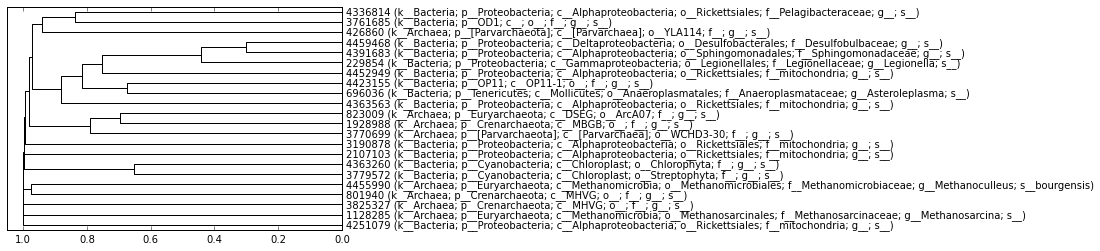

In [5]:
guide_lm = average(k_word_distances.condensed_form())
guide_d = dendrogram(guide_lm, labels=k_word_distances.ids, orientation='right', 
               link_color_func=lambda x: 'black')

In [6]:
from skbio import TreeNode

In [7]:
guide_tree = TreeNode.from_linkage_matrix(guide_lm, k_word_distances.ids)

And then do progressive alignment

In [8]:
from skbio.alignment import global_pairwise_align_nucleotide

def progressive_msa(query_sequences, guide_tree, pairwise_aligner=global_pairwise_align_nucleotide):
    # we need a parallel implementation of this functionality, and a Cython/C global aligner that can handle 
    # alignment of alignments. If done right, it could have a big impact on the field. Contact 
    # gregcaporaso@gmail.com if you have any interest in working on this. 
    c1, c2 = guide_tree.children
    if c1.is_tip():
        c1_aln = query_sequences[c1.name]
    else:
        c1_aln = progressive_msa(query_sequences, c1, pairwise_aligner)

    if c2.is_tip():
        c2_aln = query_sequences[c2.name]
    else:
        c2_aln = progressive_msa(query_sequences, c2, pairwise_aligner)
        
    return pairwise_aligner(c1_aln, c2_aln)


In [9]:
msa = progressive_msa(sequences, guide_tree)

/Users/jairideout/.virtualenvs/scikit-bio-cookbook/lib/python2.7/site-packages/skbio/alignment/_pairwise.py:594: UserWarning: make_identity_substitution_matrix is deprecated and will soon be replaced, though at the time of this writing the new name has not been finalized. Updates will be posted to issue #161: https://github.com/biocore/scikit-bio/issues/161
  warn("make_identity_substitution_matrix is deprecated and will soon be "
/Users/jairideout/.virtualenvs/scikit-bio-cookbook/lib/python2.7/site-packages/skbio/alignment/_pairwise.py:540: EfficiencyWarning: You're using skbio's python implementation of Needleman-Wunsch alignment. This is known to be very slow (e.g., thousands of times slower than a native C implementation). We'll be adding a faster version soon (see https://github.com/biocore/scikit-bio/issues/254 to track progress on this).
  "to track progress on this).", EfficiencyWarning)


We can next build a tree from this multiple sequence alignment. To do that, we'll first compute the Hamming distances between the sequences, and then pass the resulting ``DistanceMatrix`` to the ``average`` function (for now this is a UPGMA tree, in the future, we'll update to use skbio's neighbor joining function).

In [10]:
from scipy.spatial.distance import hamming
msa_distances = msa.distances(hamming)

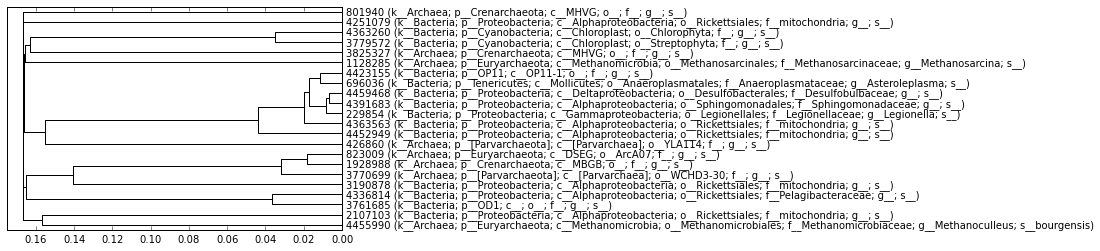

In [11]:
lm = average(msa_distances.condensed_form())
d = dendrogram(lm, labels=msa_distances.ids, orientation='right', 
               link_color_func=lambda x: 'black')